# Convolutional Neural Network MNIST

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
os.environ['CUDA_VISIBLES_DEVICES'] ='1'

/home/cesar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Checking if GPU is detected

In [2]:
if tf.test.gpu_device_name():
    print('GPU is on {}'.format(tf.test.gpu_device_name()))
else:
    print('No GPU detected')

GPU is on /device:GPU:0


In [3]:
from tensorflow.examples.tutorials.mnist import input_data

# Dowloading and Extracting Datasets

In [4]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
print (mnist.train.images.shape)
print (mnist.test.labels.shape)
tf.reset_default_graph()
sess = tf.Session()

(55000, 784)
(10000, 10)


In [89]:
inputs = mnist.train.images.shape[1]
labels = mnist.test.labels.shape[1]

# TensorFlow Model

In [6]:
learning_rate = 1e-4
epochs = 10000

n_hidden = 256


x = tf.placeholder(dtype=tf.float32, shape=(None, inputs))
y = tf.placeholder(dtype=tf.float32, shape=(None, labels))

print (x, y)

Tensor("Placeholder:0", shape=(?, 784), dtype=float32) Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


In [7]:
def bias(shape):
    values = tf.constant(0.1, shape=shape)
    return tf.Variable(values)
def filters(shape):
    filt = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(filt)
def fullyconnected(x, inp, out):
    
    with tf.name_scope("w"):
        w = tf.get_variable('w',shape=[inp, out], dtype=tf.float32)
    with tf.name_scope("x"):     
        b = tf.get_variable('x',shape=[out], dtype=tf.float32)
    fully = tf.nn.xw_plus_b(x, w, b)
    return tf.nn.relu(fully)
    
    

# Convolutional and Fully Connected Layers

In [8]:

#first layer
def conv_layers(x):
    x_ = tf.reshape(x, [-1, 28, 28, 1])
    filter1 = filters([5,5,1, 32])
    b1 = bias([32])
    first_hidden = tf.nn.conv2d(x_, filter1, strides=[1,1,1,1], padding='SAME') + b1
    convolution_one = tf.nn.relu(first_hidden)
    conv_one = tf.nn.max_pool(convolution_one, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
    #second layer
    filter2 = filters([5,5,32, 64])
    b2 = bias([64])
    sec_hidden = tf.nn.conv2d(conv_one, filter2, strides=[1,1,1,1], padding='SAME') + b2
    convolution_two = tf.nn.relu(sec_hidden)
    return tf.nn.max_pool(convolution_two, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')        

conv_two = conv_layers(x)
    #third layer 
flatten = tf.reshape(conv_two, [-1, 7*7*64])
w1 = filters([7*7*64, 1024])
bias1 = bias([1024])
print (flatten.shape, w1.shape, bias1.shape)
fully1 = tf.nn.xw_plus_b(flatten, w1, bias1)
#fc1 = fullyconnected(flatten, 7*7*64, 1024)
fc1 = tf.nn.relu(fully1)
    
#fourth layer
keep_prob = tf.placeholder(dtype=tf.float32)
fc1_dropout = tf.nn.dropout(fc1, keep_prob)
w2 = filters([1024, 10])
bias2 = bias([10])
fully2 = tf.nn.xw_plus_b(fc1_dropout, w2, bias2)
fc2 = tf.nn.relu(fully2)
    
#fc2 = fullyconnected(fc1_dropout, 1024, 10)
prediction_softmax = tf.nn.softmax(fc2)
    
    
    
    
    

(?, 3136) (3136, 1024) (1024,)


# Cross Entropy and Optmizer

In [9]:
cross_entropy = -tf.reduce_sum(y*tf.log(prediction_softmax))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

In [10]:
correct_pred = tf.equal(tf.argmax(prediction_softmax, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32)) 

# Initiating Session

In [13]:
init = tf.global_variables_initializer()
sess.run(init)

# Training Model

In [19]:
epochs = 10001
import time as t
start = t.time
try:    
    for epoch in range(epochs):
        batch = mnist.train.next_batch(100)
    
        train_acc, _, _, = sess.run([accuracy,cross_entropy,train_step], feed_dict={x: batch[0],
                                             y: batch[1],
                                             keep_prob: 0.50})
        if epoch % 1000 == 0:
            print("Epoch %d has training accuracy : %f"% (epoch, train_acc*100))
except KeyboardInterrupt:
    print('Training Interrupted')


test_acc, _, predictions, = sess.run([accuracy,cross_entropy,prediction_softmax], feed_dict={x: mnist.test.images,
                                             y: mnist.test.labels,
                                             keep_prob: 1.00})        

print("Test Accuracy %f"%(test_acc))

Epoch 0 has training accuracy : 100.000000
Epoch 1000 has training accuracy : 100.000000
Epoch 2000 has training accuracy : 100.000000
Epoch 3000 has training accuracy : 100.000000
Epoch 4000 has training accuracy : 100.000000
Epoch 5000 has training accuracy : 100.000000
Epoch 6000 has training accuracy : 100.000000
Epoch 7000 has training accuracy : 100.000000
Epoch 8000 has training accuracy : 100.000000
Epoch 9000 has training accuracy : 100.000000
Epoch 10000 has training accuracy : 100.000000
Test Accuracy 0.993200


In [24]:
pred = np.argmax(predictions, axis=1)
pred.shape

(10000,)

In [74]:
test_data=mnist.test.labels

In [29]:
test_labels = np.argmax(mnist.test.labels, axis=1)
test_labels

array([7, 2, 1, ..., 4, 5, 6])

In [41]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [64]:
def display_digits(data):
    f, axs = plt.subplots(1, len(data), figsize=(23, 23))
    for i, index in enumerate(data):
        image = mnist.test.images[index].reshape([28, 28])        
        axs[i].set_title('Pred:%d True:%d' % (test_labels[index], test_labels[index]))
        axs[i].imshow(image, cmap=plt.get_cmap('gray_r'))
        axs[i].set_axis_off()
    plt.show()
    

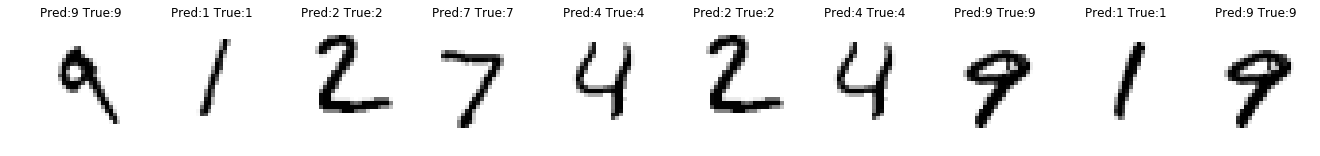

In [68]:
pred_ = pred[:10]
pred_
display_digits(pred_)

# Confusion Matrix

In [85]:

import seaborn as sb
from sklearn import metrics
labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']

In [86]:
confusion_matrix = metrics.confusion_matrix(test_labels, pred)

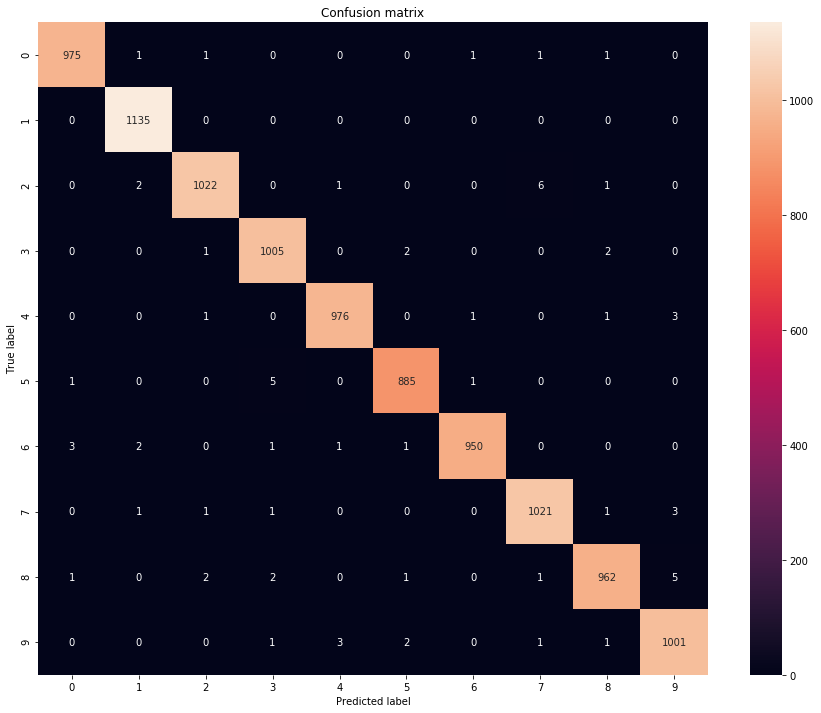

In [88]:
plt.figure(figsize=(15, 12))
sb.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()